<font size="-1">FALL 2022 
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="60px" align="right">
 </br>
<font size="-01">MATH 404: Linear and Non-Linear Programming</font>

<font size="-1">University of Science and Technology, Zewail City</font>

<br>

<h1 align="center">Research Report 1 Implementation: </h1>
<h2 align="center">Revised Simplex Method</h2>
<h2 align="center">Done by: Abdelrahman Elaraby - 201700556</h2>

---


<br> <br> <br>

The theoritical background is discussed in the PDF report, with some comments and analysis.

**Input Structure:**<br> I will use the same convetion used in the input of *scipy*'s ***linprog*** function. (Four main inputs: c, A_ub, b_ub, A_eq, b_eq)

In [ ]:
# Import used librares
import copy
import numpy as np
from numpy import inf
from numpy import nan 

In [ ]:
# to ignore warnings
import warnings
warnings. simplefilter(action='ignore', category=FutureWarning)
_ = np.seterr(all="ignore") 

In [ ]:
# function #1
def put_to_std_form(c, A_ub=[], b_ub=[], A_eq=[], b_eq=[]):
    '''
    This function puts the input in the standard cannonical form, 
    by addition of slack/surplus/artificial variables when needed.

    it also determines the indicies of A.Vs and their Sum "W".

    INPUTS:
    c: coefficients of Objective Function
    A_ub: inequality constraints coefficients but in the form of <=
    b_ub: the RHS of those inequality constraints
    A_eq: equality constraints coefficients
    b_eq: the RHS of those equality constraints

    RETURNS:
    A: main part of simplex tableau, containing the system of constrtaints' equations with cannonical form
    B: RHS of the constrtaints' equations
    C: Coefficients of Objective Function
    basic_vars: indicies of basic vars in matrix "A"
    nonbasic_vars: indicies of nonbasic vars in matrix "A"
    W: sum of A.Vs vector interms of original variables of the problem.
    AV_indx: indicies of A.Vs vars in matrix "A"

    '''
    # converting to numpy arrays
    a1 = np.array(A_ub)
    b1 = np.array(b_ub)
    a2 = np.array(A_eq)
    b2 = np.array(b_eq)

    # figuring out num of constraints
    num_of_constraints = len(a1) + len(a2)
    
    # figuring out num of variables and detect if error in input.
    if len(a1) == 0:
        num_of_constraints = len(a2)
        num_of_vars = a2.shape[1]
    elif len(a2) == 0:
        num_of_constraints = len(a1)
        num_of_vars = a1.shape[1]
    else:
        num_of_vars = 0
        if a1.shape[1] != a2.shape[1]:
            print("Error in input format.")
        else:
            num_of_vars = a1.shape[1]

    print(f'problem dimension: {(num_of_constraints, num_of_vars)}')
    ################################################################
    A = np.zeros((num_of_constraints, num_of_vars))
    B = np.zeros((num_of_constraints, 1))

    # populating the empty matrices with the given values
    for r in range(len(a1)):
        A[r] = a1[r]
    for r in range(len(a1), num_of_constraints):
        A[r] = a2[r-(len(a1))]
    for r in range(len(b1)):
        B[r] = b1[r]
    for r in range(len(b1), num_of_constraints):
        B[r] = b2[r-(len(b1))]
    ################################################################
    # initialize 2 arrays for holding the indicies of basic/nonbasic variable, aiding the algorithm. 
    basic_vars = np.array([])
    nonbasic_vars = np.array([i for i in range(A.shape[1])])
    #the sum of A.V. = w, if exists.
    w_indicies = [] # a helping list, tracing the rows that include A.V., to add them later giving w.
    AV_indx = [] # a helping list, tracing the indicies of all A.Vs
    ################################################################
    # add slack/surplus/artificial variables wherever needed.
    # inequalities
    for i, b in enumerate(b_ub):
        if b < 0:
            # restore the signs to be greater than or equal
            A[i] = A[i]*-1
            B[i] = B[i]*-1
            # add Surplus Variable
            new_col = np.zeros((num_of_constraints,1))
            new_col[i][0] = -1
            A = np.hstack( (A, new_col) )
            nonbasic_vars = np.append(nonbasic_vars, A.shape[1]-1) # to trace the index of basic and nonbasic vars
            # add Artificial Variable
            w_indicies.append(i)
            new_col = np.zeros((num_of_constraints,1))
            new_col[i][0] = 1
            A = np.hstack( (A, new_col) )
            AV_indx.append(A.shape[1]-1)
            basic_vars = np.append(basic_vars, A.shape[1]-1) # to trace the index of basic and nonbasic vars
        else:
            # add Slack Variable
            new_col = np.zeros((num_of_constraints,1))
            new_col[i][0] = 1
            A = np.hstack( (A, new_col) )
            basic_vars = np.append(basic_vars, A.shape[1]-1,)
    # equalities
    for i, b in enumerate(b_eq):
        i_ = i + len(b_ub) # start below the previous operations
        if b < 0:
            # make the values column positive if was negative
            A[i_] = A[i_]*-1
            B[i_] = B[i_]*-1
        # add Artificial Variable
        w_indicies.append(i_)
        new_col = np.zeros((num_of_constraints,1))
        new_col[i_][0] = 1
        A = np.hstack( (A, new_col) )
        AV_indx.append(A.shape[1]-1)
        basic_vars = np.append(basic_vars, A.shape[1]-1,)

    # the objective function coefficients
    C = np.concatenate((np.array(c), np.zeros(A.shape[1]-len(c))), axis=0)

    # the sum of A.Vs, W
    W = np.zeros((A.shape[1]))
    for wi in w_indicies:
        W += A[wi]
    W = W*-1
    # put A.Vs Coefficients to zero
    for i in AV_indx:
        W[i] = 0
    
    # print the std format
    print("matrix A:")
    print(A)
    print("vector B:")
    print(B)
    print("vector C:")
    print(C)
    print("vector W:")
    print(W)
    return A,B,C, basic_vars, nonbasic_vars, W, AV_indx

In [ ]:
# function #2
def rs_1p(C, A, B, basic_vars, nonbasic_vars, C2):
    '''
    revised simplex 1 phase function
    it takes its inputs after putting them in std cannonical form (aka: output of put_to_std_form function)
    it does the looping of the revised simplex algorithm till it terminates.

    INPUTS:
    C: Coefficients of Objective Function
    A: main part of simplex tableau, containing the system of constrtaints' equations with cannonical form
    B: RHS of the constrtaints' equations
    basic_vars: indicies of basic vars in matrix "A"
    nonbasic_vars: indicies of nonbasic vars in matrix "A"
    C2: Secondary Coffecients to manipulate in the process (like original OF when minimizing W)

    RETURNS:
    A,B,C,basic_vars,C2 like the inputs, but modified
    XB: New RHS
    new_Ps: New non-basic columns of matrix "A"
    '''
    # intialize the variables with the inputs
    A,B,C,C2, basic_vars,nonbasic_vars= A,B,C,C2,basic_vars,nonbasic_vars
    # C2 will be the secondarcy coefficients to update, for example, the "coefficients of F" while minimizing the W.
    num_of_constraints = A.shape[0]
    ################################################################
    # The revised simplex cares about (P columns: new_Ps, nonbasic Coeficients: new_Cs, RHS: XB, Basic matrix: Basis_mat)
    new_Ps = dict()
    new_Cs = dict()
    
    # initialize the P columns, nonbasic columns
    for i in nonbasic_vars:
        p = A[:, i]
        new_Ps[i] = p

    # initialize the nonbasic Coeficients of Objective Function
    for i in nonbasic_vars:
        new_Cs[i] = C[i]

    XB = copy.deepcopy(B)
    min_coef = min(new_Cs.items(), key=lambda x: x[1])

    #################### MAIN LOOP #################### 
    while min_coef[1] < 0:
        entering_var = min_coef[0] # pick smallest non-negative coefficient

        # just a bunch of code lines to eliminate the effect of dividing by a negative value, 
        # I replaced every -ve value from the pivot column with a zero. 
        temp_p = copy.deepcopy(new_Ps[entering_var].reshape((num_of_constraints, 1)))
        temp_p[temp_p < 0] = 0
        # divide the RHS by the pivot column
        ratio = XB/temp_p
        # a mask to replace every "nan", that results from dividing over zero, with "inf" (thus making sure it won't be least non-negative ratio)
        mask = [(ratio != 0) & ~(ratio > 0) & ~(ratio < 0)]
        ratio[mask] = inf
        ##### check if unbounded problem #####
        if np.all(ratio == inf):
            print("Unbounded Solution!")
            return A,B,C,basic_vars,XB,new_Ps 
        # pick least non-negative ratio, Feasibility Check for leaving variable
        leaving_var = int(basic_vars[np.argmin(ratio)])
   
        # switching the leaving and entering variables
        basic_vars[basic_vars == leaving_var] = entering_var
        nonbasic_vars[nonbasic_vars == entering_var] = leaving_var

        # create the basic matrix, and its inverse
        Basis_mat = A[:,basic_vars.astype(int)]
        Basis_mat_inv = np.linalg.inv(Basis_mat)
        
        # find the new P columns
        new_Ps = dict()
        for i in nonbasic_vars:
            p = A[:, i]
            p_n = np.matmul(Basis_mat_inv, p)
            new_Ps[i] = p_n

        # find the new RHS column
        XB = np.matmul(Basis_mat_inv, B)

        # detect Degeneracy Case (TBD)
        # if np.any(XB == 0):
        #     print("Degeneracy Case!")
        #     print(f'Basic Vars: {basic_vars}')
        #     print(f'XB: {XB}')
        #     return 

        # find the new Coefficients of objective function
        basic_Cs = C[basic_vars.astype(int)]
        new_Cs = dict()
        for i in nonbasic_vars:
            c_n = C[i] - np.matmul(basic_Cs, new_Ps[i])
            new_Cs[i] = c_n

        # find the new secondary Coefficients C2, if given.
        basic_Cs_2 = C2[basic_vars.astype(int)]
        new_Cs_2 = dict()
        for i in nonbasic_vars:
            c_n = C2[i] - np.matmul(basic_Cs_2, new_Ps[i])
            new_Cs_2[i] = c_n

        # find the new minimum coefficient  
        min_coef = min(new_Cs.items(), key=lambda x: x[1])

        # change the dicts to np arrays
        C = np.zeros(A.shape[1])
        for e in new_Cs.items():
            C[e[0]] = e[1]

        C2 = np.zeros(A.shape[1])
        for e in new_Cs_2.items():
            C2[e[0]] = e[1]

    if min_coef[1] >= 0:
        print("Found Optimal Point") # sth tbd ==0?
        return A,B,C,basic_vars,XB,new_Ps,C2

In [ ]:
# main function
def revised_simplex(c, A_ub=[], b_ub=[], A_eq=[], b_eq=[]):
    '''
    The main Revised Simplex function, with 2 phase capability if needed.

    INPUTS:
    c: coefficients of Objective Function
    A_ub: inequality constraints coefficients but in the form of <=
    b_ub: the RHS of those inequality constraints
    A_eq: equality constraints coefficients
    b_eq: the RHS of those equality constraints

    RETURNS:
    f: optimal function value
    basic_vars: the indicies of basic variables
    XB: the corresponding values to the basic variables, RHS.
    '''
    # put the problem in standard format
    A,B,C,basic_vars,nonbasic_vars,W, AV_indx = put_to_std_form(c, A_ub, b_ub, A_eq, b_eq)

    if sum(W) != 0:
        print("This is a 2 phase problem")

        # Do first phase
        A,B,W,basic_vars,XB,new_Ps,C = rs_1p(W, A, B, basic_vars, nonbasic_vars, C)

        # check if can be solved
        for av in AV_indx:
            if av in basic_vars:
                print("No Feasible Solution Exists")
                return
              
        # recreating the simplex tableau, and Coefficients
        num_of_constraints = A.shape[0]
        num_of_vars = A.shape[1]
        A = np.zeros((num_of_constraints, 1)) # dummy initial A matrix
  
        for i in range(num_of_vars):
            if (i in new_Ps.keys()) and (i not in AV_indx):
                temp_col = np.array(new_Ps[i])
                temp_col = temp_col.reshape((num_of_constraints, 1))
                A = np.hstack( (A, temp_col) )
            elif i in basic_vars:
                temp_col = np.zeros((num_of_constraints,1))
                indx = np.where(basic_vars == i)[0][0]
                temp_col[indx,0] = 1
                A = np.hstack( (A, temp_col) )
                # new_basic_vars.append(A.shape[1]-2) # keeping track of the new basic vars
        A = np.delete(A, 0, axis=1)

        new_basic_vars = [v for v in basic_vars if v not in AV_indx] # new basic vars (old but A.V cols removed)
        basic_vars = np.array(new_basic_vars) # updating basic vars to new ones
        
        # updating nonbasic vars to new ones
        num_of_vars = A.shape[1]
        nb_list = []
        for i in new_Ps.keys():
            if i not in AV_indx:
                av_before_it = sum((AV_indx<i)) # to account for the removal of A.V, if before it, subtract from it.
                nb_list.append(i-av_before_it)
        nonbasic_vars = np.array(nb_list)

        # Remove A.V. Coefficients
        C = np.delete(C, AV_indx)
        # Redifine B
        B = XB

    # Do second phase
    A,B,C,basic_vars,XB,new_Ps,W = rs_1p(C, A, B, basic_vars, nonbasic_vars, W)
    
    # calculating optimal function value
    f = 0
    for i,coef in enumerate(c):
        if i in basic_vars:
            indx = np.where(basic_vars == i)[0][0]
            f+= coef*XB[indx]
    print(f'--------------------------SOLUTION--------------------------------')        
    print(f'optimal F: {f}')
    print(f'Basic Vars: {basic_vars}')
    print(f'XB: {XB}')
    return f,basic_vars,XB

# **Testing and Comparisons:**

In [ ]:
from scipy.optimize import linprog
import time

**Test Case 1:**

A simple case, all are "less than or equal" constraints. 

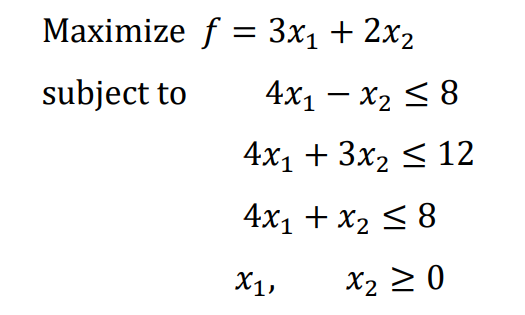

In [ ]:
# using my code
c = [-3, -2]
A_ub = [[4, -1], [4, 3], [4, 1]]
b_ub = [8, 12, 8]

start_t = time.time()
f,v,b = revised_simplex(c, A_ub,b_ub)
end_t = time.time()
total_time = end_t-start_t

print("----------------------------------")
print(f'Time taken (in seconds): {total_time}')

problem dimension: (3, 2)
matrix A:
[[ 4. -1.  1.  0.  0.]
 [ 4.  3.  0.  1.  0.]
 [ 4.  1.  0.  0.  1.]]
vector B:
[[ 8.]
 [12.]
 [ 8.]]
vector C:
[-3. -2.  0.  0.  0.]
vector W:
[-0. -0. -0. -0. -0.]
Found Optimal Point
--------------------------SOLUTION--------------------------------
optimal F: [-8.5]
Basic Vars: [0. 2. 1.]
XB: [[1.5]
 [4. ]
 [2. ]]
----------------------------------
Time taken (in seconds): 0.0373077392578125


In [ ]:
# using scipy code
c = [-3, -2]
A = [[4, -1], [4, 3], [4, 1]]
b = [8, 12, 8]

x0_bounds = (0, None)
x1_bounds = (0, None)

start_t = time.time()
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])
print(f'Function optimal value: {res.fun}')
print(f'Variables optimal values: {res.x}')
end_t = time.time()
total_time = end_t-start_t


print("----------------------------------")
print(f'Time taken (in seconds): {total_time}')

Function optimal value: -8.499999998072843
Variables optimal values: [1.5 2. ]
----------------------------------
Time taken (in seconds): 0.021223783493041992


################################################################################

**Test Case 2:**

A complex case containing all types of constraints

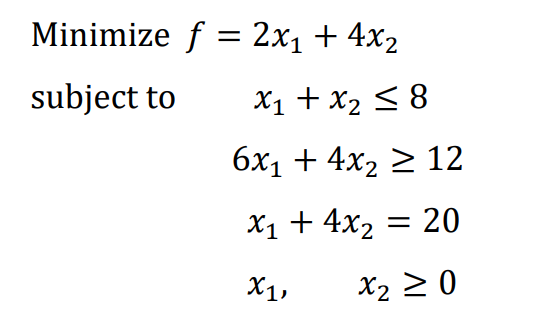

In [ ]:
# using my code
c = [2, 4]
A_ub = [[1, 1], [-6, -4]]
b_ub = [8, -12]

A_eq = [[1, 4]]
b_eq = [20]

start_t = time.time()
f,v,b = revised_simplex(c, A_ub, b_ub, A_eq, b_eq)
end_t = time.time()
total_time = end_t-start_t

print("----------------------------------")
print(f'Time taken (in seconds): {total_time}')

problem dimension: (3, 2)
matrix A:
[[ 1.  1.  1.  0.  0.  0.]
 [ 6.  4. -0. -1.  1.  0.]
 [ 1.  4.  0.  0.  0.  1.]]
vector B:
[[ 8.]
 [12.]
 [20.]]
vector C:
[2. 4. 0. 0. 0. 0.]
vector W:
[-7. -8. -0.  1.  0.  0.]
This is a 2 phase problem
Found Optimal Point
Found Optimal Point
--------------------------SOLUTION--------------------------------
optimal F: [20.]
Basic Vars: [2. 1. 3.]
XB: [[3.]
 [5.]
 [8.]]
----------------------------------
Time taken (in seconds): 0.0613102912902832


In [ ]:
# using scipy code
c = [2, 4]
A_ub = [[1, 1], [-6, -4]]
b_ub = [8, -12]

A_eq = [[1, 4]]
b_eq = [20]

x0_bounds = (0, None)
x1_bounds = (0, None)

start_t = time.time()
res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=[x0_bounds, x1_bounds])
print(f'Function optimal value: {res.fun}')
print(f'Variables optimal values: {res.x}')
end_t = time.time()
total_time = end_t-start_t


print("----------------------------------")
print(f'Time taken (in seconds): {total_time}')

Function optimal value: 19.999999934894447
Variables optimal values: [2.61541005e-08 4.99999997e+00]
----------------------------------
Time taken (in seconds): 0.02824711799621582


################################################################################

**Test Case 3:**

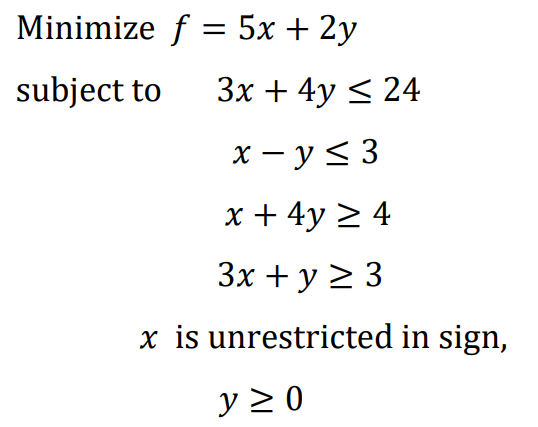

In [ ]:
# using my code
c = [5, 2]
A_ub = [[3, 4], [1, -1], [-1, -4], [-3, -1]]
b_ub = [24, 3, -4, -3]

start_t = time.time()
f,v,b = revised_simplex(c, A_ub, b_ub)
end_t = time.time()
total_time = end_t-start_t

print("----------------------------------")
print(f'Time taken (in seconds): {total_time}')

problem dimension: (4, 2)
matrix A:
[[ 3.  4.  1.  0.  0.  0.  0.  0.]
 [ 1. -1.  0.  1.  0.  0.  0.  0.]
 [ 1.  4. -0. -0. -1.  1.  0.  0.]
 [ 3.  1. -0. -0. -0. -0. -1.  1.]]
vector B:
[[24.]
 [ 3.]
 [ 4.]
 [ 3.]]
vector C:
[5. 2. 0. 0. 0. 0. 0. 0.]
vector W:
[-4. -5. -0. -0.  1.  0.  1.  0.]
This is a 2 phase problem
Found Optimal Point
Found Optimal Point
--------------------------SOLUTION--------------------------------
optimal F: [5.27272727]
Basic Vars: [2. 3. 1. 0.]
XB: [[18.54545455]
 [ 3.09090909]
 [ 0.81818182]
 [ 0.72727273]]
----------------------------------
Time taken (in seconds): 0.02970147132873535


In [ ]:
# using scipy code
c = [5, 2]
A = [[3, 4], [1, -1], [-1, -4], [-3, -1]]
b = [24, 3, -4, -3]
x0_bounds = (None, None)
x1_bounds = (0, None)

start_t = time.time()
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])
print(f'Function optimal value: {res.fun}')
print(f'Variables optimal values: {res.x}')
end_t = time.time()
total_time = end_t-start_t

print("----------------------------------")
print(f'Time taken (in seconds): {total_time}')

Function optimal value: 5.272727272740655
Variables optimal values: [0.72727273 0.81818182]
----------------------------------
Time taken (in seconds): 0.030143022537231445


## **Applications**

Snippets were taken from the slides of MATH404 class by Dr.Abdelsamea

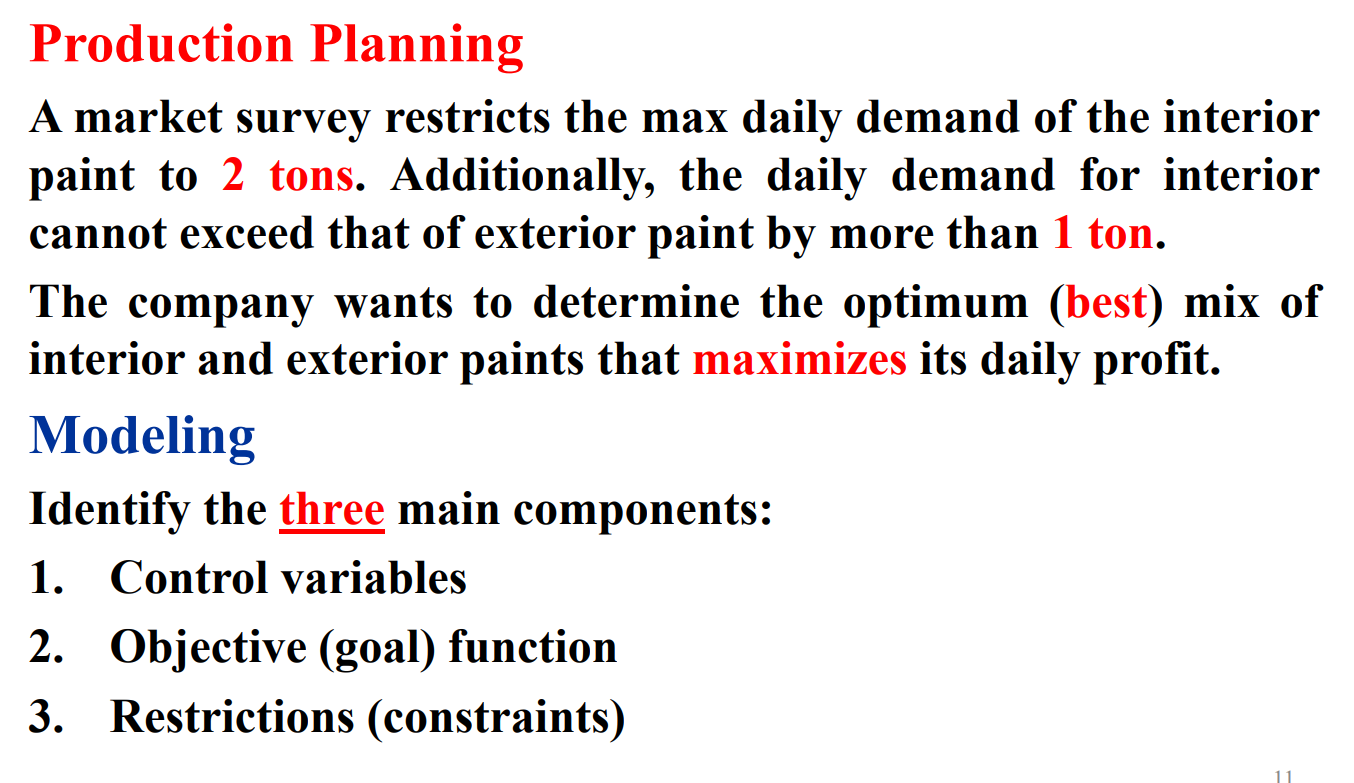

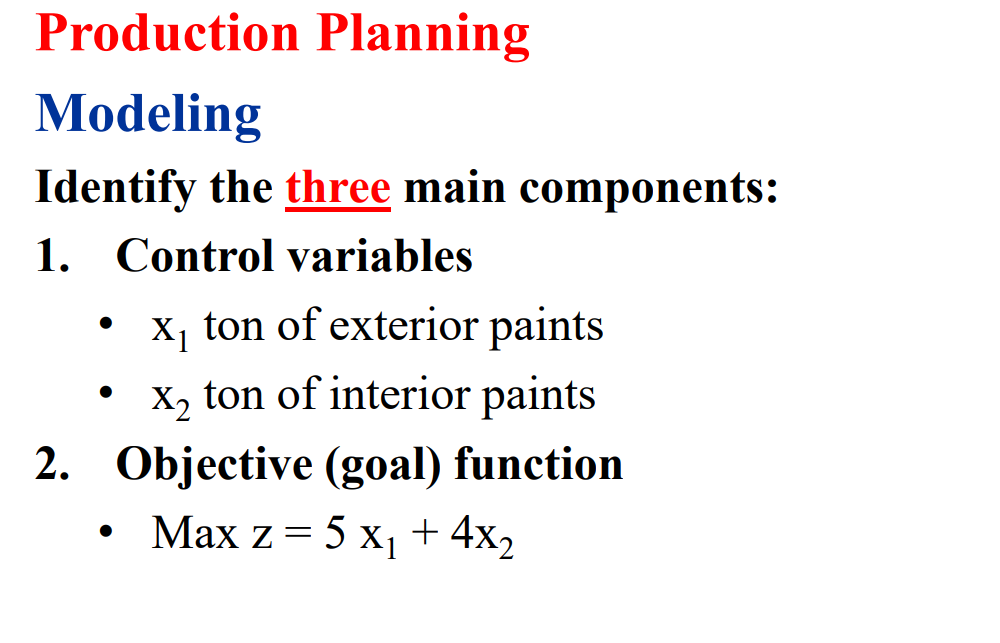

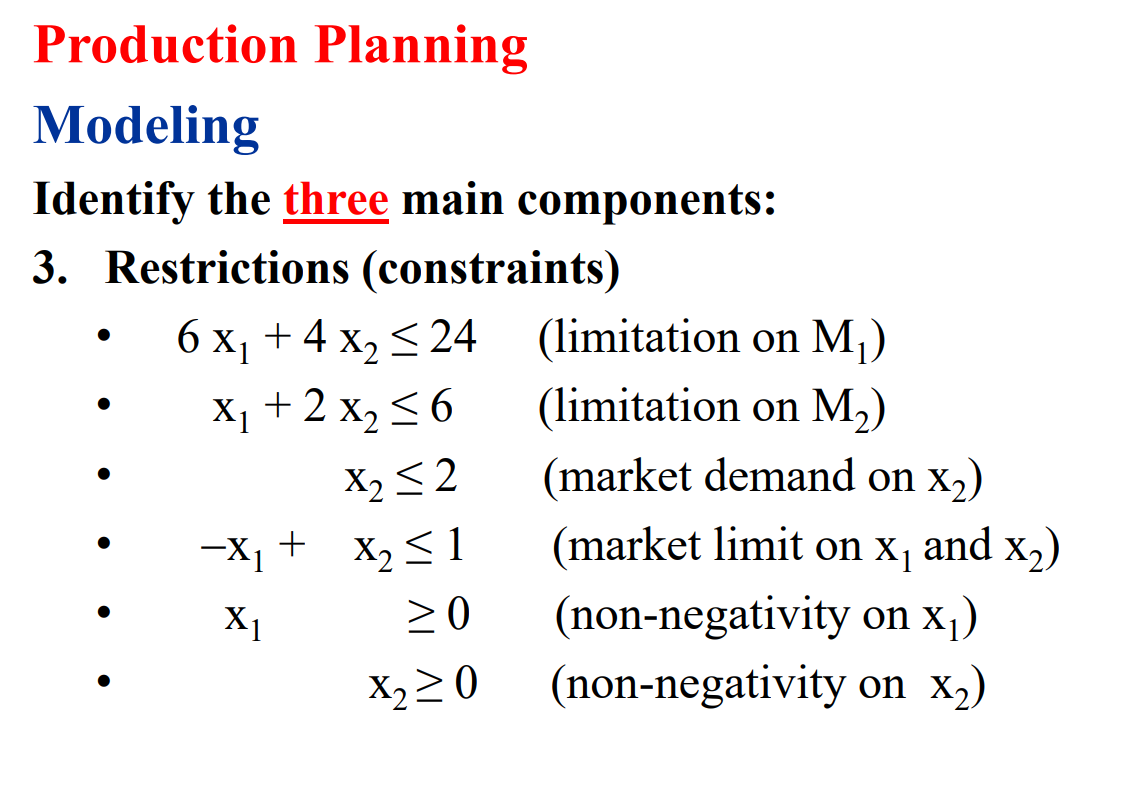

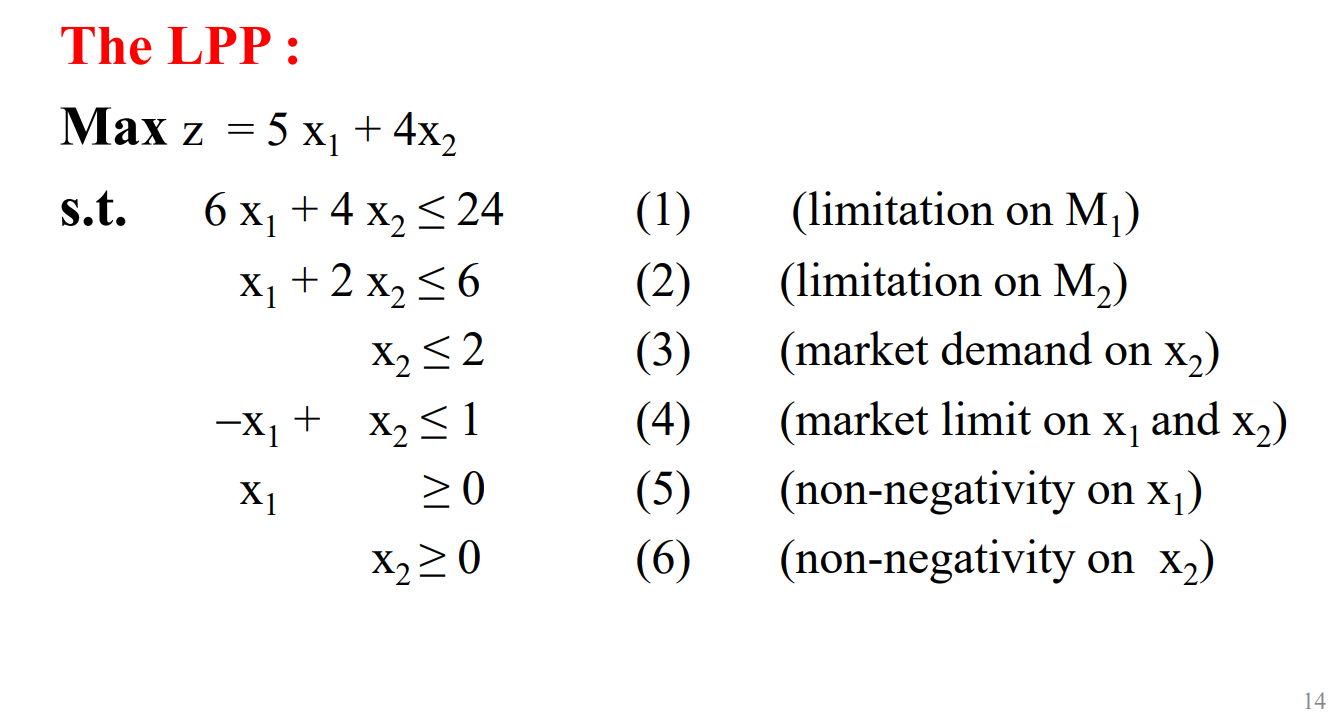

In [ ]:
# using my code
c = [-5, -4]
A_ub = [[6, 4], [1, 2], [0, 1], [-1, 1]]
b_ub = [24, 6, 2, 1]

start_t = time.time()
f,v,b = revised_simplex(c, A_ub, b_ub)
end_t = time.time()
total_time = end_t-start_t

print("----------------------------------")
print(f'Time taken (in seconds): {total_time}')

problem dimension: (4, 2)
matrix A:
[[ 6.  4.  1.  0.  0.  0.]
 [ 1.  2.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.]
 [-1.  1.  0.  0.  0.  1.]]
vector B:
[[24.]
 [ 6.]
 [ 2.]
 [ 1.]]
vector C:
[-5. -4.  0.  0.  0.  0.]
vector W:
[-0. -0. -0. -0. -0. -0.]
Found Optimal Point
--------------------------SOLUTION--------------------------------
optimal F: [-21.]
Basic Vars: [0. 1. 4. 5.]
XB: [[3. ]
 [1.5]
 [0.5]
 [2.5]]
----------------------------------
Time taken (in seconds): 0.01741766929626465
